In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns

In [24]:
df = pd.read_csv('data/equipment_data.csv', parse_dates=['saledate'], low_memory=False)

# Data Cleaning/EDA

In [25]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null datetime64[ns]
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                

There are a lot of missing values here... let's look at the missing values for each column.

For MachineHoursCurrentMeter, we can replace 0 with np.nan because the data dictionary file says that both 0 and null values mean that no hours were reported.

In [27]:
df['MachineHoursCurrentMeter'].replace(0, np.nan, inplace=True)

We can drop null values from Enclosure because there are so few

In [28]:
df.dropna(subset=['Enclosure'], inplace=True)

In [29]:
df['Hydraulics'].value_counts()

2 Valve                141404
Standard               104423
Auxiliary               40737
Base + 1 Function       24770
3 Valve                  5622
4 Valve                  2960
Base + 3 Function         299
Base + 2 Function         127
Base + 5 Function          89
Base + 4 Function          76
Base + 6 Function          53
None or Unspecified        10
Name: Hydraulics, dtype: int64

In [30]:
df['Hydraulics'] = df['Hydraulics'].replace({'Base + 1 Function': 'Base +',
                                                   'Base + 2 Function': 'Base +',
                                                   'Base + 3 Function': 'Base +',
                                                   'Base + 4 Function': 'Base +',
                                                   'Base + 5 Function': 'Base +',
                                                   'Base + 6 Function': 'Base +',
                                                  })

We can put all null values in the "None or Unspecified" category

In [31]:
df['Hydraulics'] = df['Hydraulics'].replace(np.nan, 'None or Unspecified')

In [32]:
def plot_boxplot(x):
    sns.boxplot(x=x, y='SalePrice', data=df)
    plt.show()

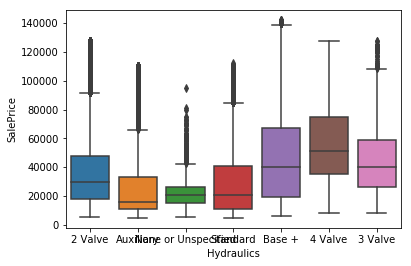

In [33]:
plot_boxplot('Hydraulics')

In [34]:
df['ProductSize'].value_counts()

Medium            62198
Large / Medium    49637
Small             26446
Mini              24814
Large             20914
Compact            6086
Name: ProductSize, dtype: int64

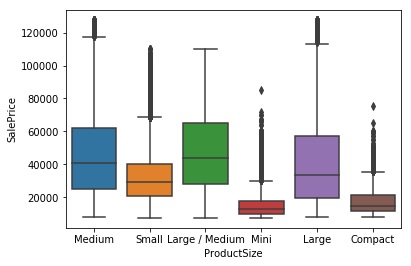

In [35]:
plot_boxplot('ProductSize')

In [36]:
df['ProductSize'].fillna('Medium', inplace=True)

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalesID,400800.0,1.919760e+06,909258.933700,1139246.0,1418278.75,1639287.5,2242724.25,6333342.0
SalePrice,400800.0,3.110223e+04,23041.323334,4750.0,14500.00,24000.0,40000.00,142000.0
MachineID,400800.0,1.218007e+06,440977.700331,0.0,1088790.00,1279545.5,1468105.25,2486330.0
ModelID,400800.0,6.891301e+03,6220.441782,28.0,3261.00,4604.0,8724.00,37198.0
datasource,400800.0,1.346671e+02,8.964396,121.0,132.00,132.0,136.00,172.0
auctioneerID,380668.0,6.556456e+00,16.978494,0.0,1.00,2.0,4.00,99.0
YearMade,400800.0,1.899256e+03,291.664490,1000.0,1985.00,1995.0,2000.00,2013.0
MachineHoursCurrentMeter,69608.0,7.089214e+03,39185.499022,2.0,1572.00,3137.0,6265.00,2483300.0


In [38]:
df.isnull().sum().sort_values()

SalesID                          0
state                            0
fiProductClassDesc               0
ProductSize                      0
Enclosure                        0
fiBaseModel                      0
fiModelDesc                      0
ProductGroup                     0
saledate                         0
YearMade                         0
datasource                       0
ModelID                          0
MachineID                        0
SalePrice                        0
Hydraulics                       0
ProductGroupDesc                 0
auctioneerID                 20132
fiSecondaryDesc             137071
Coupler                     186848
Forks                       208723
Transmission                217570
Ride_Control                252194
Drive_System                296439
Ripper                      296663
Undercarriage_Pad_Width     300928
Thumb                       301512
Stick_Length                301582
Pattern_Changer             301582
Grouser_Type        

In [39]:
# remove columns with any null values

col_lengths = df.apply(lambda x: x.count())
keep_cols = col_lengths[col_lengths == len(df)] #these are the columns w/ no missing values

In [40]:
df = df[keep_cols.index].copy()

YearMade appears to have some outliers

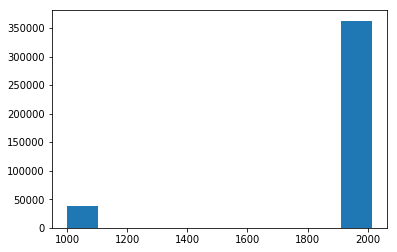

In [41]:
plt.hist(df['YearMade'])
plt.show()

In [42]:
sorted(df['YearMade'].unique())[:5]

[1000, 1919, 1920, 1937, 1942]

In [43]:
df['YearMade'].value_counts().head()

1000    38115
1998    21213
2005    20587
2004    20009
1997    18894
Name: YearMade, dtype: int64

In [44]:
df['YearMade'].value_counts().head()/df['YearMade'].count()

1000    0.095097
1998    0.052927
2005    0.051365
2004    0.049923
1997    0.047141
Name: YearMade, dtype: float64

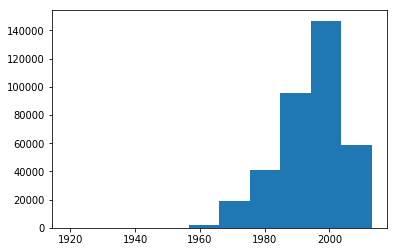

In [45]:
plt.hist(df[df['YearMade']>1000]['YearMade'])
plt.show()

The outlier year, 1000, is also the most common value and accounts for almost 10% of our data so we might not want to drop it. For now, we will replace it with the mean.

In [46]:
mean = df[df['YearMade']>1000]['YearMade'].mean()
mean

1993.7595075616582

In [47]:
df['YearMade'] = df['YearMade'].replace(1000, mean)

In [48]:
df['ProductGroup'].head()

0     WL
1     WL
2    SSL
3    TEX
4    SSL
Name: ProductGroup, dtype: object

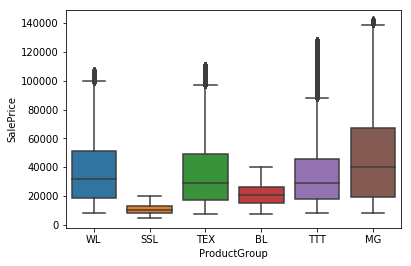

In [49]:
plot_boxplot('ProductGroup')

In [50]:
df['ProductGroupDesc'].head()

0          Wheel Loader
1          Wheel Loader
2    Skid Steer Loaders
3      Track Excavators
4    Skid Steer Loaders
Name: ProductGroupDesc, dtype: object

ProductGroup and ProductGroupDesc are the same... one is just an abbreviated version of the other, so we don't need both.

In [51]:
df.drop('ProductGroup', axis=1, inplace=True)

In [52]:
df['saledate'].value_counts().head(10)

2009-02-16    1932
2011-02-15    1352
2008-02-19    1300
2010-02-15    1219
2008-02-11    1098
2009-03-26    1050
2008-02-03    1007
2009-02-09     998
2009-01-31     940
2009-03-19     914
Name: saledate, dtype: int64

In [53]:
# Feature Engineering - Equipment Age

df['equipment_age'] = df['saledate'].dt.year - df['YearMade']
df.drop(['saledate','YearMade'], axis=1, inplace=True)

In [54]:
def plot_scatter(x):
    plt.scatter(df[x], df['SalePrice'])
    plt.xlabel(x)
    plt.ylabel('SalePrice')
    plt.show()

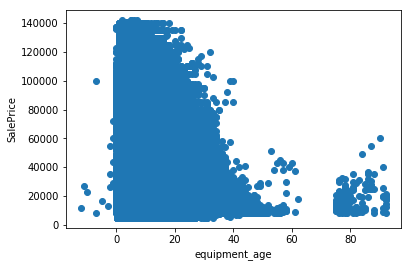

In [55]:
plot_scatter('equipment_age')

We can see a negative correlation betwen sale price and equipment age

There are some outliers here - negative values and ages above 70. Let's drop them.

In [56]:
df = df[df['equipment_age']>=0]
df = df[df['equipment_age']<70]

In [57]:
df = pd.get_dummies(df, columns=['Hydraulics','ProductSize'], drop_first=True)

In [58]:
df['Enclosure'].value_counts()

OROPS                  173836
EROPS                  138988
EROPS w AC              87795
EROPS AC                   17
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64

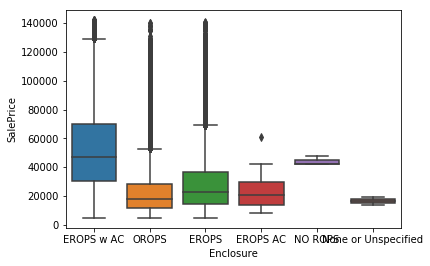

In [59]:
plot_boxplot('Enclosure')

In [60]:
# exclude last three values from Enclosure because value counts are very low and then create dummy variables

df = df[(df['Enclosure'] != 'NO ROPS') & 
        (df['Enclosure'] != 'EROPS AC') & 
        (df['Enclosure'] != 'None or Unspecified')] 

df = pd.get_dummies(df, columns=['Enclosure'], drop_first=True)

In [61]:
df.drop(['fiModelDesc',
               'fiBaseModel', 
               'fiProductClassDesc', 
               'state',
               'SalesID',
               'MachineID',
               'ModelID',
               'ProductGroupDesc',
               'datasource',
                 ], axis=1, inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400619 entries, 0 to 401124
Data columns (total 15 columns):
SalePrice                         400619 non-null int64
equipment_age                     400619 non-null float64
Hydraulics_3 Valve                400619 non-null uint8
Hydraulics_4 Valve                400619 non-null uint8
Hydraulics_Auxiliary              400619 non-null uint8
Hydraulics_Base +                 400619 non-null uint8
Hydraulics_None or Unspecified    400619 non-null uint8
Hydraulics_Standard               400619 non-null uint8
Enclosure_EROPS w AC              400619 non-null uint8
Enclosure_OROPS                   400619 non-null uint8
ProductSize_Large                 400619 non-null uint8
ProductSize_Large / Medium        400619 non-null uint8
ProductSize_Medium                400619 non-null uint8
ProductSize_Mini                  400619 non-null uint8
ProductSize_Small                 400619 non-null uint8
dtypes: float64(1), int64(1), uint8(13)
memory 

# Modeling

In [68]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [69]:
X = df.drop(['SalePrice'], axis=1)
X = sm.add_constant(X)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [70]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Features,VIF Factor
0,const,72.643802
1,equipment_age,1.314207
2,Hydraulics_3 Valve,1.034833
3,Hydraulics_4 Valve,1.022248
4,Hydraulics_Auxiliary,1.740905
5,Hydraulics_Base +,1.225578
6,Hydraulics_None or Unspecified,1.419439
7,Hydraulics_Standard,2.785949
8,Enclosure_EROPS w AC,1.432317
9,Enclosure_OROPS,1.861347


In [71]:
reg = sm.OLS(y_train, X_train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                 2.535e+04
Date:                Tue, 20 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:27:36   Log-Likelihood:            -3.3276e+06
No. Observations:              300464   AIC:                         6.655e+06
Df Residuals:                  300449   BIC:                         6.655e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           3.216e+04    243.164    132.243      0.000    3.17e+04    3.26e+04
equipment_age                  -1359.5430      4.515   -301.098      0.000   -1368.393   -1350.693
Hydraulics_3 Valve              1665.5365    246.538      6.756      0.000    1182.328    2148.745
Hydraulics_4 Valve               1.17e+04    334.684     34.953      0.000     1.1e+04    1.24e+04
Hydraulics_Auxiliary            -2.65e+04    124.373   -213.068      0.000   -2.67e+04   -2.63e+04
Hydraulics_Base +               1.602e+04    129.522    123.658      0.000    1.58e+04    1.63e+04
Hydraulics_None or Unspecified -1.637e+04     84.856   -192.927      0.000   -1.65e+04   -1.62e+04
Hydraulics_Standard            -2.526e+04    108.404   -232.977      0.000   -2.55e+04    -2.5e+04
Enclosure_EROPS w AC            1.308e+04     82.383    158.785      0.000    1.29e+04    1.32e+04
Enclosure_OROPS                -5600.2141     78.361    -71.467      0.000   -5753.799   -5446.629
ProductSize_Large                3.57e+04    267.654    133.381      0.000    3.52e+04    3.62e+04
ProductSize_Large / Medium      4.694e+04    273.344    171.736      0.000    4.64e+04    4.75e+04
ProductSize_Medium              1.929e+04    237.761     81.128      0.000    1.88e+04    1.98e+04
ProductSize_Mini                1.682e+04    283.888     59.257      0.000    1.63e+04    1.74e+04
ProductSize_Small               3.219e+04    282.988    113.744      0.000    3.16e+04    3.27e+04
==============================================================================
Omnibus:                    46695.688   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123389.239
Skew:                           0.859   Prob(JB):                         0.00
Kurtosis:                       5.627   Cond. No.                         267.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
print "R-SQARED AGAINST UNSEEN TEST DATA:"
print round(lm.score(X_test, y_test),3)

R-SQARED AGAINST UNSEEN TEST DATA:
0.542


Final takeaways:

Features associated with higher selling prices for heavy equipment:
* equipment age - younger
* product size - larger/medium
* enclosure - EROPS w AC
* hydraulics - Base+ or 4 valve